In [1]:
!pip3 install torch

/bin/sh: pip3: command not found


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

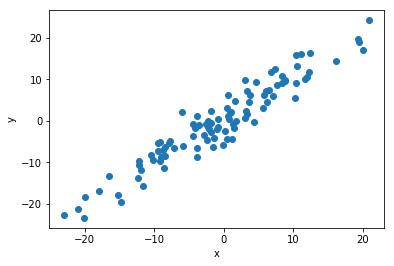

In [3]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [4]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [6]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [7]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

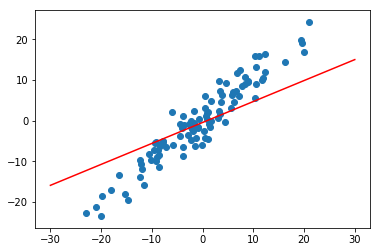

In [8]:
plot_fit('Initial Model')

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 29.567289352416992
epoch: 1 loss: 20.30146026611328
epoch: 2 loss: 15.1963472366333
epoch: 3 loss: 12.37902545928955
epoch: 4 loss: 10.819835662841797
epoch: 5 loss: 9.952714920043945
epoch: 6 loss: 9.466449737548828
epoch: 7 loss: 9.189937591552734
epoch: 8 loss: 9.029096603393555
epoch: 9 loss: 8.932194709777832
epoch: 10 loss: 8.87077808380127
epoch: 11 loss: 8.829190254211426
epoch: 12 loss: 8.798811912536621
epoch: 13 loss: 8.77489185333252
epoch: 14 loss: 8.754806518554688
epoch: 15 loss: 8.737103462219238
epoch: 16 loss: 8.72097396850586
epoch: 17 loss: 8.70595932006836
epoch: 18 loss: 8.691801071166992
epoch: 19 loss: 8.67834758758545
epoch: 20 loss: 8.665502548217773
epoch: 21 loss: 8.65320873260498
epoch: 22 loss: 8.641424179077148
epoch: 23 loss: 8.630117416381836
epoch: 24 loss: 8.6192626953125
epoch: 25 loss: 8.608840942382812
epoch: 26 loss: 8.598833084106445
epoch: 27 loss: 8.58922004699707
epoch: 28 loss: 8.579986572265625
epoch: 29 loss: 8.57111835479736

Text(0.5, 0, 'epoch')

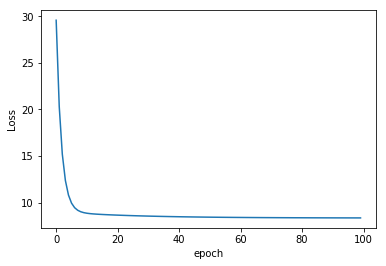

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

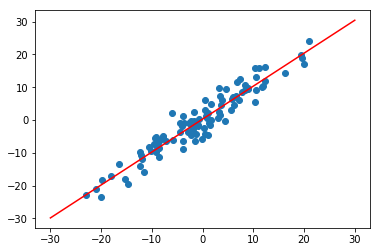

In [12]:
plot_fit("Trained Model")